# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
pip install citipy


In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import API keys
#import api_key

api_key = ""

#Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "resources/output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Create Lists
city_list = []
country_list = []
lats_list = []
lngs_list = []
date_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_speed_list = []

#Set Counter Values
index_counter = 0
set_counter = 1

In [31]:
#Print Start Message
print("Start")
print("-------------------------------")

#Set URL and API Key
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

#Begin For Loop 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        date_list.append(response["dt"])
        temp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloud_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
    
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found.")

#Print End Message       
print("-------------------------------")
print("Complete")
print("-------------------------------")



Start
-------------------------------
City not found.
Processing Record 1 of Set 1 : areka
Processing Record 2 of Set 1 : yeppoon
Processing Record 3 of Set 1 : bambous virieux
Processing Record 4 of Set 1 : hamilton
Processing Record 5 of Set 1 : albany
Processing Record 6 of Set 1 : hilo
Processing Record 7 of Set 1 : port alfred
Processing Record 8 of Set 1 : acapulco
City not found.
Processing Record 9 of Set 1 : bulanash
Processing Record 10 of Set 1 : tilichiki
Processing Record 11 of Set 1 : jamestown
Processing Record 12 of Set 1 : vallenar
City not found.
Processing Record 13 of Set 1 : ancud
Processing Record 14 of Set 1 : tamiahua
Processing Record 15 of Set 1 : baykit
Processing Record 16 of Set 1 : tuktoyaktuk
Processing Record 17 of Set 1 : bredasdorp
Processing Record 18 of Set 1 : cape town
Processing Record 19 of Set 1 : ribeira grande
Processing Record 20 of Set 1 : wanaka
Processing Record 21 of Set 1 : portland
Processing Record 22 of Set 1 : valenca
Processing Reco

Processing Record 39 of Set 4 : san patricio
Processing Record 40 of Set 4 : gallup
Processing Record 41 of Set 4 : tura
Processing Record 42 of Set 4 : naze
Processing Record 43 of Set 4 : port saint lucie
Processing Record 44 of Set 4 : port hardy
Processing Record 45 of Set 4 : busselton
Processing Record 46 of Set 4 : verkhnevilyuysk
Processing Record 47 of Set 4 : praia da vitoria
Processing Record 48 of Set 4 : mount gambier
Processing Record 49 of Set 4 : rawson
Processing Record 50 of Set 4 : sao desiderio
Processing Record 0 of Set 5 : biloela
Processing Record 1 of Set 5 : adrar
Processing Record 2 of Set 5 : oranzherei
Processing Record 3 of Set 5 : lagoa
Processing Record 4 of Set 5 : takoradi
Processing Record 5 of Set 5 : roebourne
City not found.
Processing Record 6 of Set 5 : komatipoort
Processing Record 7 of Set 5 : kalmunai
Processing Record 8 of Set 5 : ilulissat
Processing Record 9 of Set 5 : tahe
Processing Record 10 of Set 5 : port macquarie
Processing Record 11 

Processing Record 27 of Set 8 : fortuna
Processing Record 28 of Set 8 : tongchuan
Processing Record 29 of Set 8 : kuznechnoye
Processing Record 30 of Set 8 : asmar
Processing Record 31 of Set 8 : itaporanga
Processing Record 32 of Set 8 : sao joao da barra
Processing Record 33 of Set 8 : morondava
Processing Record 34 of Set 8 : zbarazh
Processing Record 35 of Set 8 : san cristobal
Processing Record 36 of Set 8 : koslan
Processing Record 37 of Set 8 : amapa
Processing Record 38 of Set 8 : scarborough
Processing Record 39 of Set 8 : magalia
Processing Record 40 of Set 8 : poninka
Processing Record 41 of Set 8 : piacabucu
Processing Record 42 of Set 8 : dingle
Processing Record 43 of Set 8 : waingapu
Processing Record 44 of Set 8 : uspenka
Processing Record 45 of Set 8 : regina
Processing Record 46 of Set 8 : smoky lake
Processing Record 47 of Set 8 : bugulma
Processing Record 48 of Set 8 : saint-georges
Processing Record 49 of Set 8 : rafraf
City not found.
Processing Record 50 of Set 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#Convert Results into DataFrame
weather_data = pd.DataFrame({
    "City" : city_list,
    "Country" : country_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Date" : date_list, 
    "Max Temp" : temp_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list
})

In [33]:
#Display DataFrame
weather_data.head(10)

#Save DataFrame as CSV File
weather_data.to_csv("City_Data.csv", encoding="utf-8")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
#Remove Cities with Humidity over 100%
clean_city_data = weather_data.loc[weather_data["Humidity"] >= 100]

#Display Results
clean_city_data.head(10)

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Clouds,Wind Speed
96,Clyde River,CA,70.4692,-68.5914,1624742142,35.83,100,90,17.27
186,Alice Springs,AU,-23.7000,133.8833,1624742157,29.75,100,0,0.00
200,Mount Gambier,AU,-37.8333,140.7667,1624742185,44.51,100,40,4.61
512,Petropavlovsk-Kamchatskiy,RU,53.0452,158.6483,1624742318,48.79,100,20,4.47
553,Bintulu,MY,3.1667,113.0333,1624742335,73.81,100,40,1.14
560,Martapura,ID,-3.4167,114.8500,1624742338,75.29,100,74,2.30


In [37]:
#  Get the indices of cities that have humidity over 100%.


In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

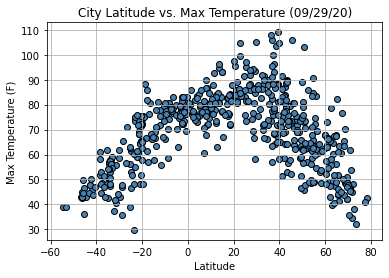

In [39]:
#Plot Latitude vs. Temperature Plot 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

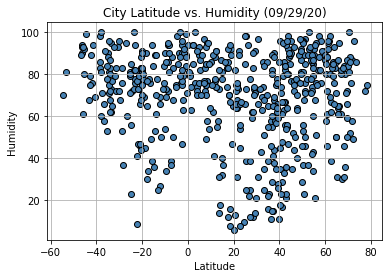

In [40]:
#Plot Latitude vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

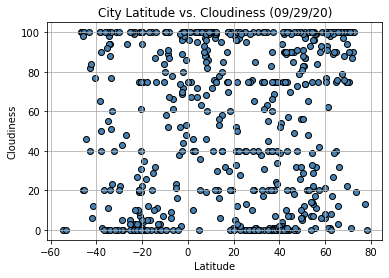

In [41]:
#Plot Latitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

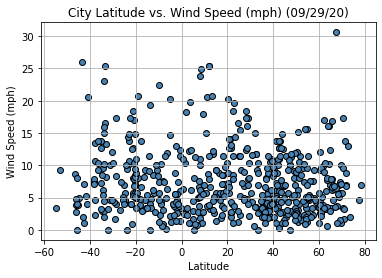

In [42]:
#PLot Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (09/29/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save Scatter Plot as PNG
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [43]:
# Create Northern and Southern Hemisphere DataFrames
#Set Latitude for Northern Hemisphere
nothern_hemi = weather_data.loc[weather_data["Lat"] >= 0.0]
nothern_hemi.reset_index(inplace=True)

#Set Latitude for Southern Hemisphere
southern_hemi = weather_data.loc[weather_data["Lat"] < 0.0]
southern_hemi.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


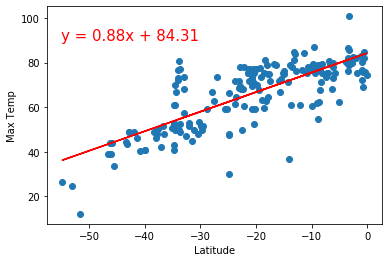

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


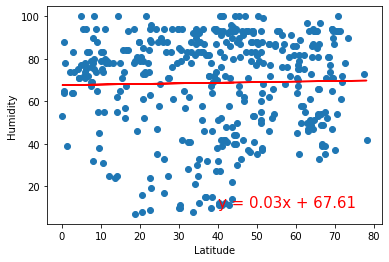

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


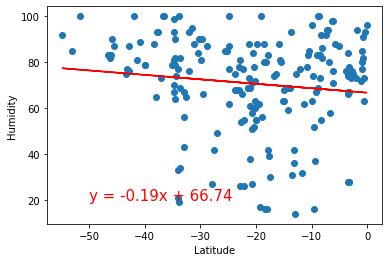

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


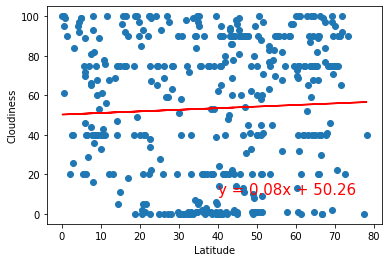

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


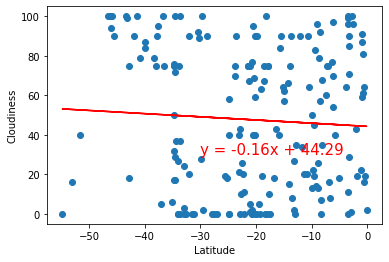

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


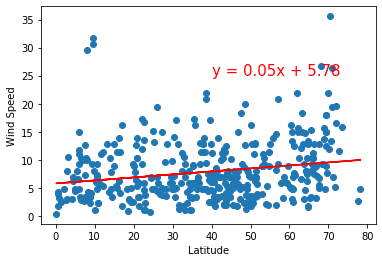

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


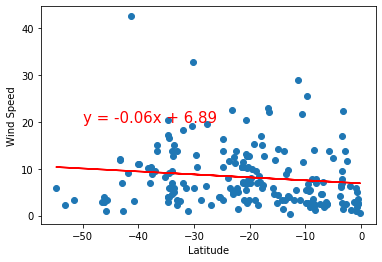